In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("../data/CarPricePrediction.csv")


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2688 entries, 0 to 2687
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Màu sắc              2688 non-null   object
 1   Tiêu đề              2688 non-null   object
 2   Chủ                  2688 non-null   object
 3   Phân loại người bán  2688 non-null   object
 4   Địa chỉ              2688 non-null   object
 5   Hãng                 2688 non-null   object
 6   Dòng xe              2688 non-null   object
 7   Năm sản xuất         2688 non-null   object
 8   Số Km đã đi          2688 non-null   object
 9   Tình trạng           2688 non-null   object
 10  Hộp số               2688 non-null   object
 11  Nhiên liệu           2688 non-null   object
 12  Kiểu dáng            2688 non-null   object
 13  Số chỗ               2688 non-null   object
 14  Xuất xứ              2688 non-null   object
 15  Chính sách bảo hành  2688 non-null   object
 16  Trọng 

In [4]:
df = df[df['Giá'] != '-']

In [5]:
df['Giá'] = df['Giá'].replace('[\.,đ]', '', regex=True).astype(int)

In [6]:
df_columns = df.columns
df_columns

Index(['Màu sắc', 'Tiêu đề', 'Chủ', 'Phân loại người bán', 'Địa chỉ', 'Hãng',
       'Dòng xe', 'Năm sản xuất', 'Số Km đã đi', 'Tình trạng', 'Hộp số',
       'Nhiên liệu', 'Kiểu dáng', 'Số chỗ', 'Xuất xứ', 'Chính sách bảo hành',
       'Trọng lượng', 'Trọng tải', 'Giá', 'Đối tác', 'href'],
      dtype='object')

In [7]:
for col in df_columns:
    print(col,' có ',len(df[df[col]=='-']),' dòng chứa giá trị`-`')

Màu sắc  có  0  dòng chứa giá trị`-`
Tiêu đề  có  0  dòng chứa giá trị`-`
Chủ  có  0  dòng chứa giá trị`-`
Phân loại người bán  có  1007  dòng chứa giá trị`-`
Địa chỉ  có  0  dòng chứa giá trị`-`
Hãng  có  0  dòng chứa giá trị`-`
Dòng xe  có  0  dòng chứa giá trị`-`
Năm sản xuất  có  0  dòng chứa giá trị`-`
Số Km đã đi  có  282  dòng chứa giá trị`-`
Tình trạng  có  0  dòng chứa giá trị`-`
Hộp số  có  0  dòng chứa giá trị`-`
Nhiên liệu  có  0  dòng chứa giá trị`-`
Kiểu dáng  có  365  dòng chứa giá trị`-`
Số chỗ  có  310  dòng chứa giá trị`-`
Xuất xứ  có  0  dòng chứa giá trị`-`
Chính sách bảo hành  có  0  dòng chứa giá trị`-`
Trọng lượng  có  0  dòng chứa giá trị`-`
Trọng tải  có  0  dòng chứa giá trị`-`
Giá  có  0  dòng chứa giá trị`-`
Đối tác  có  0  dòng chứa giá trị`-`
href  có  0  dòng chứa giá trị`-`


In [8]:
def plot_circle(data, text):
    # Calculate the distribution of colors
    color_counts = data.value_counts()

    # Plotting the pie chart
    plt.figure(figsize=(8, 8))
    plt.pie(color_counts, labels=color_counts.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)

    plt.title(f'Biểu đồ thể hiện phân bố {text}')  
    plt.show()

In [9]:
def plot_circle_top10(data, text):
    # Calculate the distribution of colors
    color_counts = data.value_counts()

    # Identify the top 10 values
    top_10_nam_san_xuat = color_counts.nlargest(10).index

    # Replace other values with 'Khác'
    Model = data.apply(lambda x: x if x in top_10_nam_san_xuat else 'Khác')

    # Recalculate the distribution of colors
    updated_color_counts = Model.value_counts()

    # Plotting the pie chart
    plt.figure(figsize=(8, 8))
    wedges, texts, autotexts = plt.pie(updated_color_counts, labels=updated_color_counts.index, autopct=lambda p: '{:.1f}%\n({:,})'.format(p, int(round(p * sum(updated_color_counts) / 100))), startangle=90, colors=plt.cm.Paired.colors)

    # Adding percentage and count labels
    plt.setp(autotexts, size=8, weight="bold", color="white")

    plt.title(f'Top 10 {text}')
    plt.show()
   


In [10]:
def plot_bar_percent_count(data,text):
    # Calculate the distribution of colors
    color_counts = data.value_counts()

    # Calculate the percentage distribution
    color_percentages = color_counts / color_counts.sum() * 100

    # Plotting the horizontal stacked bar chart
    fig, ax = plt.subplots(figsize=(8, 6))
    bars = plt.barh(color_percentages.index, color_percentages, color=plt.cm.Paired.colors)

    # Adding count and percentage labels beside each bar
    for bar in bars:
        xval = bar.get_width()
        count_label = int(xval / 100 * color_counts.sum())
        plt.text(xval + 1, bar.get_y() + bar.get_height() / 2, f'{count_label} - {xval:.1f}%', va='center')

    # Adding labels and title
    plt.xlabel('Số Lượng và Phần trăm')
    plt.ylabel(f'{text}')
    plt.title('Biểu đồ Cột Chồng Ngang với Số Lượng và Phần Trăm')
    plt.xticks(
    range(0, 101, 10),  # Adjusted range to include 0 to 100 in steps of 10
    ['{:,.0f}%'.format(x) for x in range(0, 101, 10)]  # Adjusted range and format
)
    # Set x-axis limit to 100%
    plt.xlim(0, 100)

    # Display the plot
    plt.show()

In [11]:
def plot_bar_xprice(df, data, text):
    # Extract the first element of each name after splitting by '-'
    data = data.apply(lambda x: x.split('-')[0])

    # Identify the top 10 values
    top_10 = data.value_counts().nlargest(10).index

    # Filter the original DataFrame for the top 10 hãng
    df_top_10 = df[data.isin(top_10)]

    # Group by 'Hãng' and calculate the mean of 'Giá' for each group
    average_prices = df_top_10.groupby(f'{text}')['Giá'].mean()

    # Plotting the bar chart
    plt.figure(figsize=(10, 6))
    bars = plt.barh(average_prices.index, average_prices, color=plt.cm.Paired.colors)

    # Adding price labels in the middle of each bar
    for bar in bars:
        xval = bar.get_width() / 2
        yval = bar.get_y() + bar.get_height() / 2
        price_label = "{:,.0f}".format(bar.get_width())
        plt.text(xval, yval, price_label, ha='center', va='center', color='black')

    # Dynamically set xticks based on the maximum value in the data
    max_value = max(average_prices)
    plt.gca().get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:}".format(int(x))))

    # Format xticks based on the magnitude
    plt.xticks(
        range(0, int(max_value) + 200000000, 200000000),
        ['{:,.0f}tr'.format(x / 1000000) if x < 1000000000 else '{:,.1f}tỷ'.format(x / 1000000000) for x in range(0, int(max_value) + 200000000, 200000000)]
    )
    
    # Adding labels and title
    plt.xlabel('Giá Trung Bình')
    plt.ylabel(f'{text}')
    plt.title(f'Giá Trung Bình Theo {text}')
    plt.show()


In [12]:
def plot_price_count(df,data,text):
    # Group by 'Năm sản xuất' and calculate the mean of 'Giá' for each group
    average_prices = df.groupby(f'{text}')['Giá'].mean()

    # Count the number of cars in each year
    car_count = data.value_counts().sort_index()

    # Create a figure and primary y-axis
    fig, ax1 = plt.subplots(figsize=(20, 6))

    # Plot the car count on the primary y-axis
    ax1.bar(car_count.index, car_count, color='r', zorder=2)
    ax1.set_ylabel('Số lượng xe', color='r')

    # Format y-axis tick labels as integers
    ax1.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda y, loc: "{:,.0f}".format(y)))

    # Create a secondary y-axis
    ax2 = ax1.twinx()

    # Plot the average prices on the secondary y-axis
    ax2.plot(average_prices.index, average_prices, marker='o', linestyle='-', color='b', zorder=1)
    ax2.set_ylabel('Giá Trung Bình', color='b')

    # Format y-axis tick labels as integers
    ax2.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda y, loc: "{:,.0f}tr".format(y / 1000000) if y < 1000000000 else "{:,.1f}tỷ".format(y / 1000000000)))

    ax1.set_title(f'Số lượng xe và Giá xe trung bình qua các {text}')
    ax1.set_xlabel(f'{text}')

    plt.show()

In [13]:
def plot_top_10(df, data, text):
    # Extract the first element of each name after splitting by '-'
    data = data.apply(lambda x: x.split('-')[0])

    # Get the top 10 individuals with the highest counts
    top_10_counts = data.value_counts().nlargest(10).index

    # Filter the original DataFrame for the top 10 individuals
    df_top_10 = df[data.isin(top_10_counts)]

    # Group by 'Chủ' and calculate the mean of 'Giá' for each group
    average_prices = df_top_10.groupby(f'{text}').mean()

    # Plotting bar chart for top 10 individuals by count
    plt.figure(figsize=(8, 12))  # Two rows, one column

    plt.subplot(2, 1, 1)  # Two rows, one column, first subplot
    data.value_counts().nlargest(10).sort_values().plot(kind='barh', color=plt.cm.Paired.colors)
    plt.title(f'Top 10 {text}')
    plt.xlabel('Số lượng xe bán')

    # Plotting bar chart for top 10 individuals by highest average 'Giá'
    plt.subplot(2, 1, 2)  # Two rows, one column, second subplot
    average_prices.sort_values(by='Giá', ascending=False).plot(kind='barh', y=f'Giá', x=f'{text}', color=plt.cm.Paired.colors)
    plt.title(f'Top 10 {text} so về giá cả')
    plt.xlabel('Giá trung bình')

    # Format x-axis tick labels as currency
    plt.gca().get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:}".format(int(x))))
    plt.xticks(
        range(0, 2000000000, 200000000),
        ['{:,.0f}tr'.format(x / 1000000) if x < 1000000000 else '{:,.1f}tỷ'.format(x / 1000000000) for x in range(0, 2000000000, 200000000)]
    )
    # Display the plot
    plt.tight_layout()
    plt.show()


In [14]:
def plot_few_value(df, data,text):
    plot_circle(data,text)
    plot_bar_percent_count(data,text)
    plot_bar_xprice(df,data,text)
    plot_price_count(df,data,text)

# **Màu sắc**

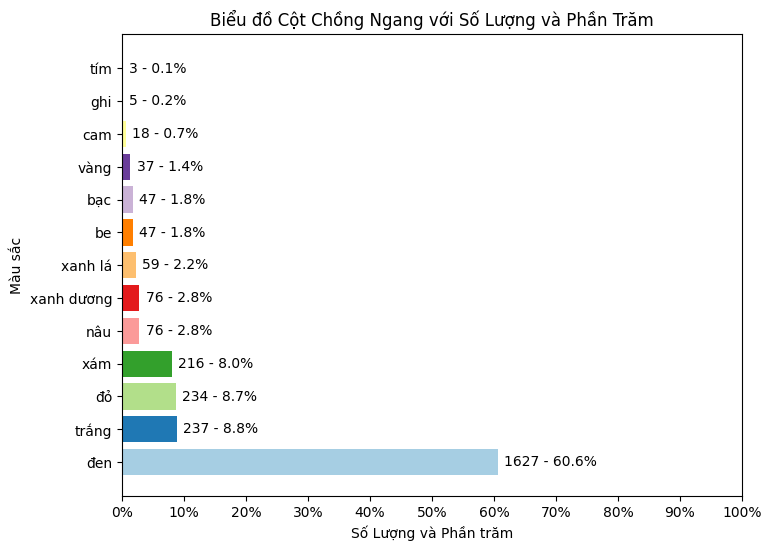

In [15]:
plot_bar_percent_count(df['Màu sắc'],'Màu sắc')

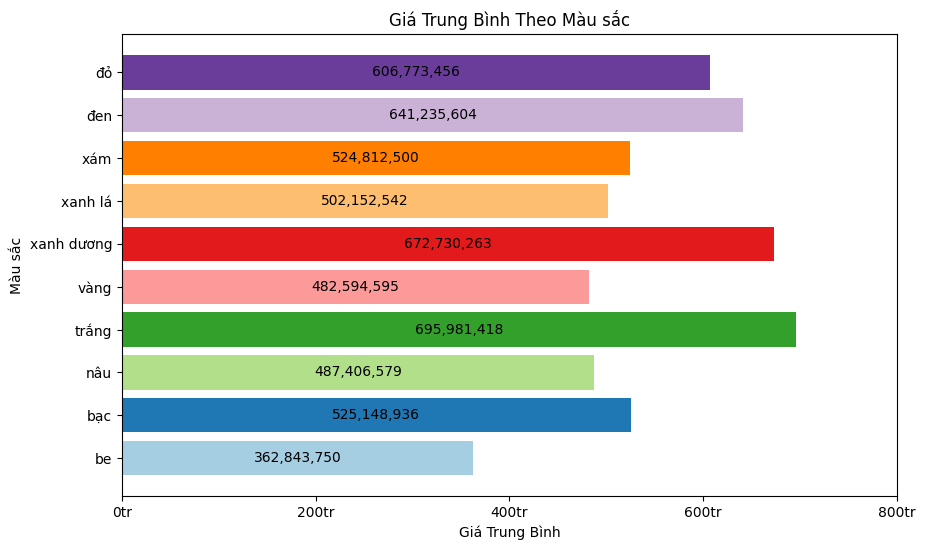

In [16]:
plot_bar_xprice(df,df['Màu sắc'],'Màu sắc')

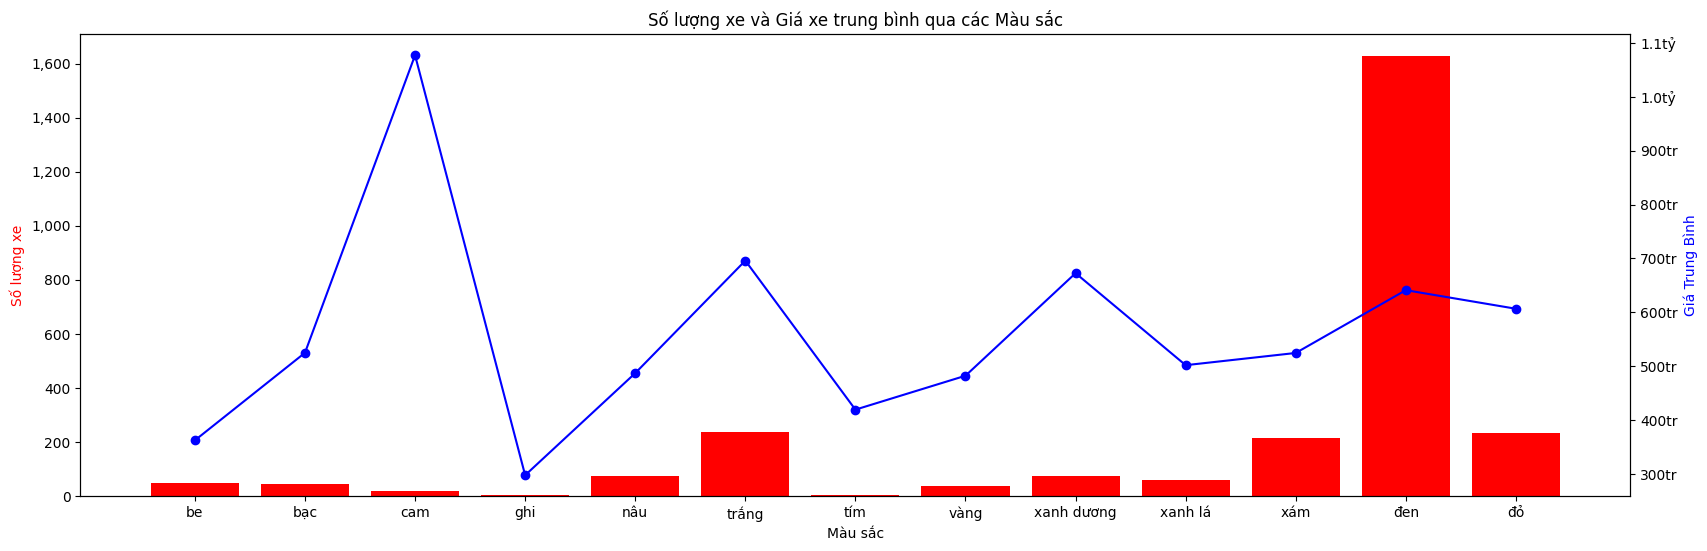

In [17]:
plot_price_count(df,df['Màu sắc'],'Màu sắc')

# **Chủ**

/var/folders/cq/ntgqkzfn65s54w230dxt1rkm0000gn/T/ipykernel_13948/809390149.py:11: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  average_prices_chu = df_top_10.groupby('Chủ').mean()


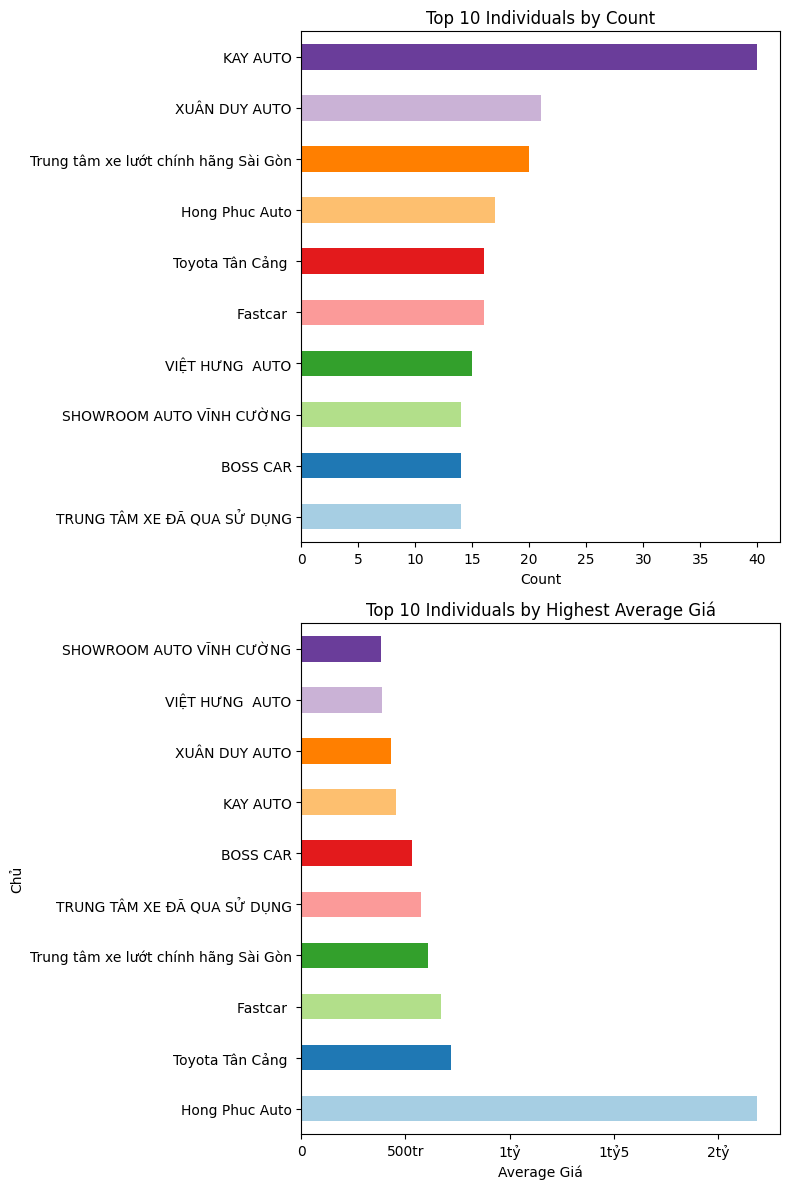

In [18]:
# Extract the first element of each name after splitting by '-'
df['Chủ'] = df['Chủ'].apply(lambda x: x.split('-')[0])

# Get the top 10 individuals with the highest counts
top_10_chu_counts = df['Chủ'].value_counts().nlargest(10).index

# Filter the original DataFrame for the top 10 individuals
df_top_10 = df[df['Chủ'].isin(top_10_chu_counts)]

# Group by 'Chủ' and calculate the mean of 'Giá' for each group
average_prices_chu = df_top_10.groupby('Chủ').mean()

# Plotting bar chart for top 10 individuals by count
plt.figure(figsize=(8, 12))  # Two rows, one column

plt.subplot(2, 1, 1)  # Two rows, one column, first subplot
df['Chủ'].value_counts().nlargest(10).sort_values().plot(kind='barh', color=plt.cm.Paired.colors)
plt.title('Top 10 Individuals by Count')
plt.xlabel('Count')

# Plotting bar chart for top 10 individuals by highest average 'Giá'
plt.subplot(2, 1, 2)  # Two rows, one column, second subplot
average_prices_chu.sort_values(by='Giá', ascending=False)['Giá'].plot(kind='barh', color=plt.cm.Paired.colors)
plt.title('Top 10 Individuals by Highest Average Giá')
plt.xlabel('Average Giá')

# Format x-axis tick labels as currency
plt.gca().get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:}".format(int(x))))
plt.xticks([0, 500000000, 1000000000, 1500000000, 2000000000],
           ['0', '500tr', '1tỷ', '1tỷ5',  '2tỷ'])
# Display the plot
plt.tight_layout()
plt.show()

In [42]:
# Filter for 'Đối tác' == 'Yes'
doi_tac_df = df[df['Đối tác'] == 'Yes']

# Count the occurrences of each individual
count_by_chu = doi_tac_df['Chủ'].value_counts()

# Count how many individuals have the same count
count_by_count = count_by_chu.value_counts().sort_index()

# Iterate through the counts and display information
max_count = count_by_chu.max()

for count in range(1, max_count + 1):
    individuals_with_count = count_by_chu[count_by_chu == count].index

# Display the count of individuals for each count
print('Số lượng người làm đối tác theo số lượng xe:')
print(count_by_count)

Số lượng người làm đối tác theo số lượng xe:
1    346
2     60
3     23
4     21
5      7
6      5
7      3
8      1
9      1
Name: Chủ, dtype: int64


In [43]:
# Filter for 'Đối tác' == 'Yes'
doi_tac_df = df[df['Đối tác'] == 'No']

# Count the occurrences of each individual
count_by_chu = doi_tac_df['Chủ'].value_counts()

# Count how many individuals have the same count
count_by_count = count_by_chu.value_counts().sort_index()

# Iterate through the counts and display information
max_count = count_by_chu.max()

for count in range(1, max_count + 1):
    individuals_with_count = count_by_chu[count_by_chu == count].index
    # Xem danh sách những người bán X xe:
    # print(f'Chủ có {count} xe và làm đối tác:')
    # for chu in individuals_with_count:
    #     print(f' - {chu}')
    # print('\n')


# Display the count of individuals for each count
print('Số lượng người làm đối tác theo số lượng xe:')
print(count_by_count)

Số lượng người làm đối tác theo số lượng xe:
1     598
2     165
3      62
4      50
5      23
6      13
7      15
8      15
9       8
10      5
11      2
12      1
13      1
14      1
16      1
32      1
Name: Chủ, dtype: int64


# **Phân loại người bán**

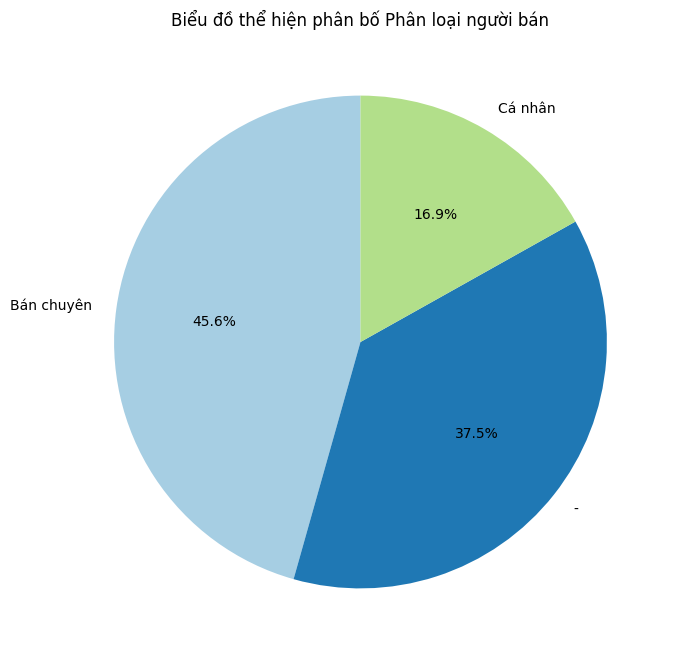

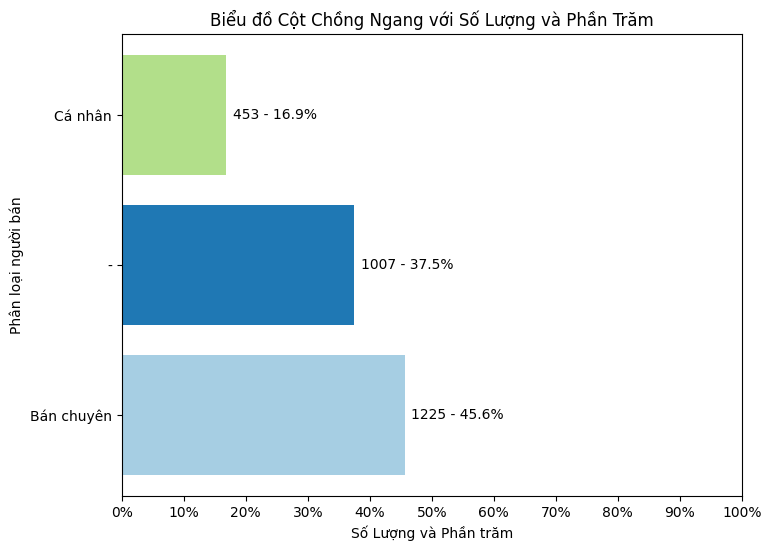

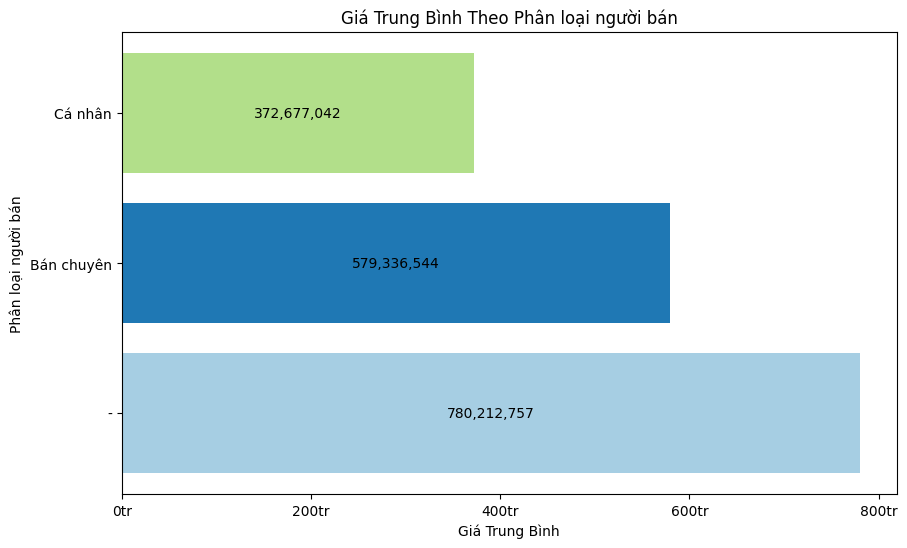

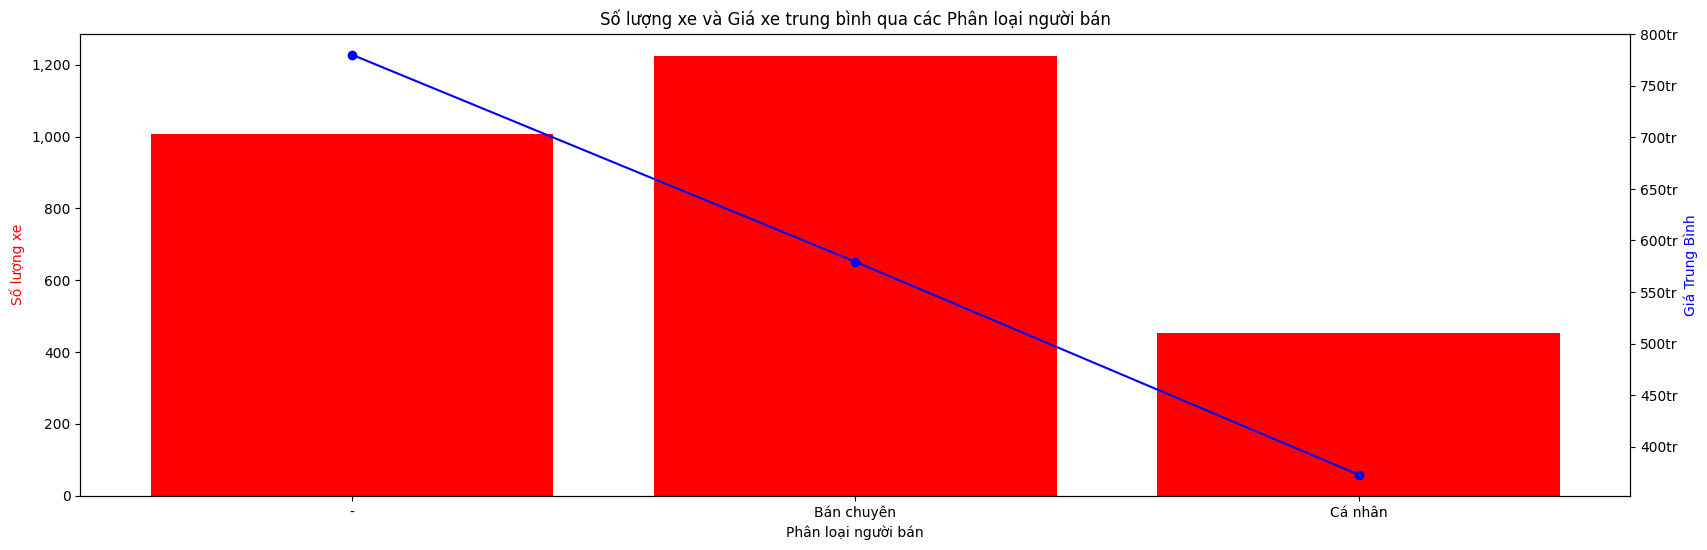

In [20]:
plot_few_value(df,df['Phân loại người bán'],'Phân loại người bán')

# **Địa chỉ**

# **Hãng**

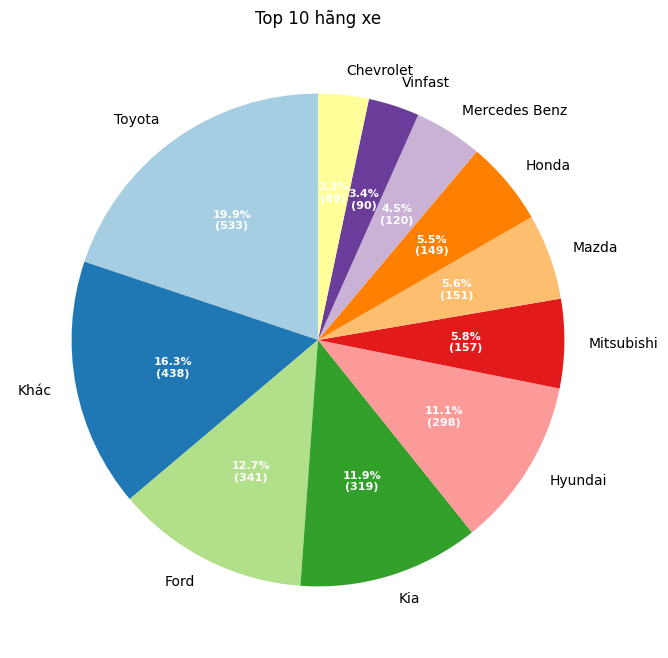

In [21]:
plot_circle_top10(df['Hãng'],'hãng xe')

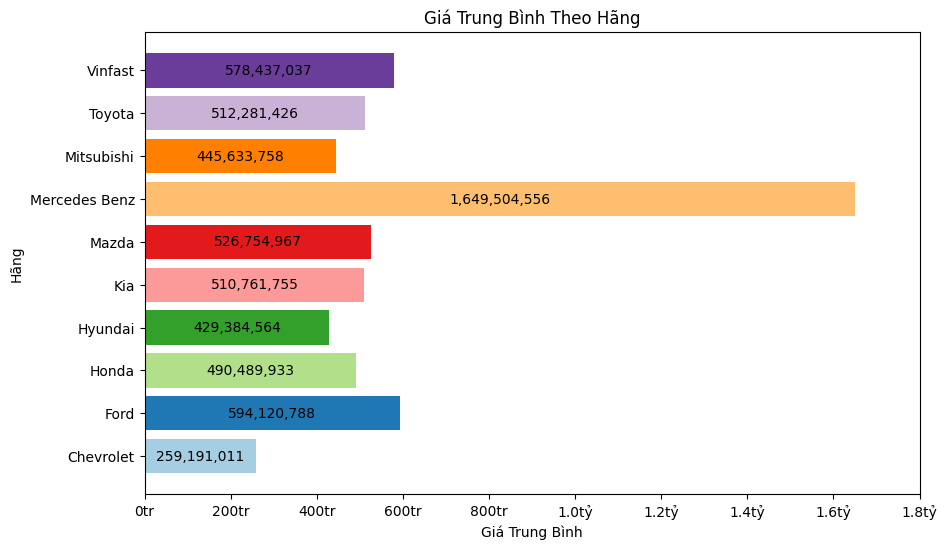

In [22]:
plot_bar_xprice(df,df['Hãng'],'Hãng')

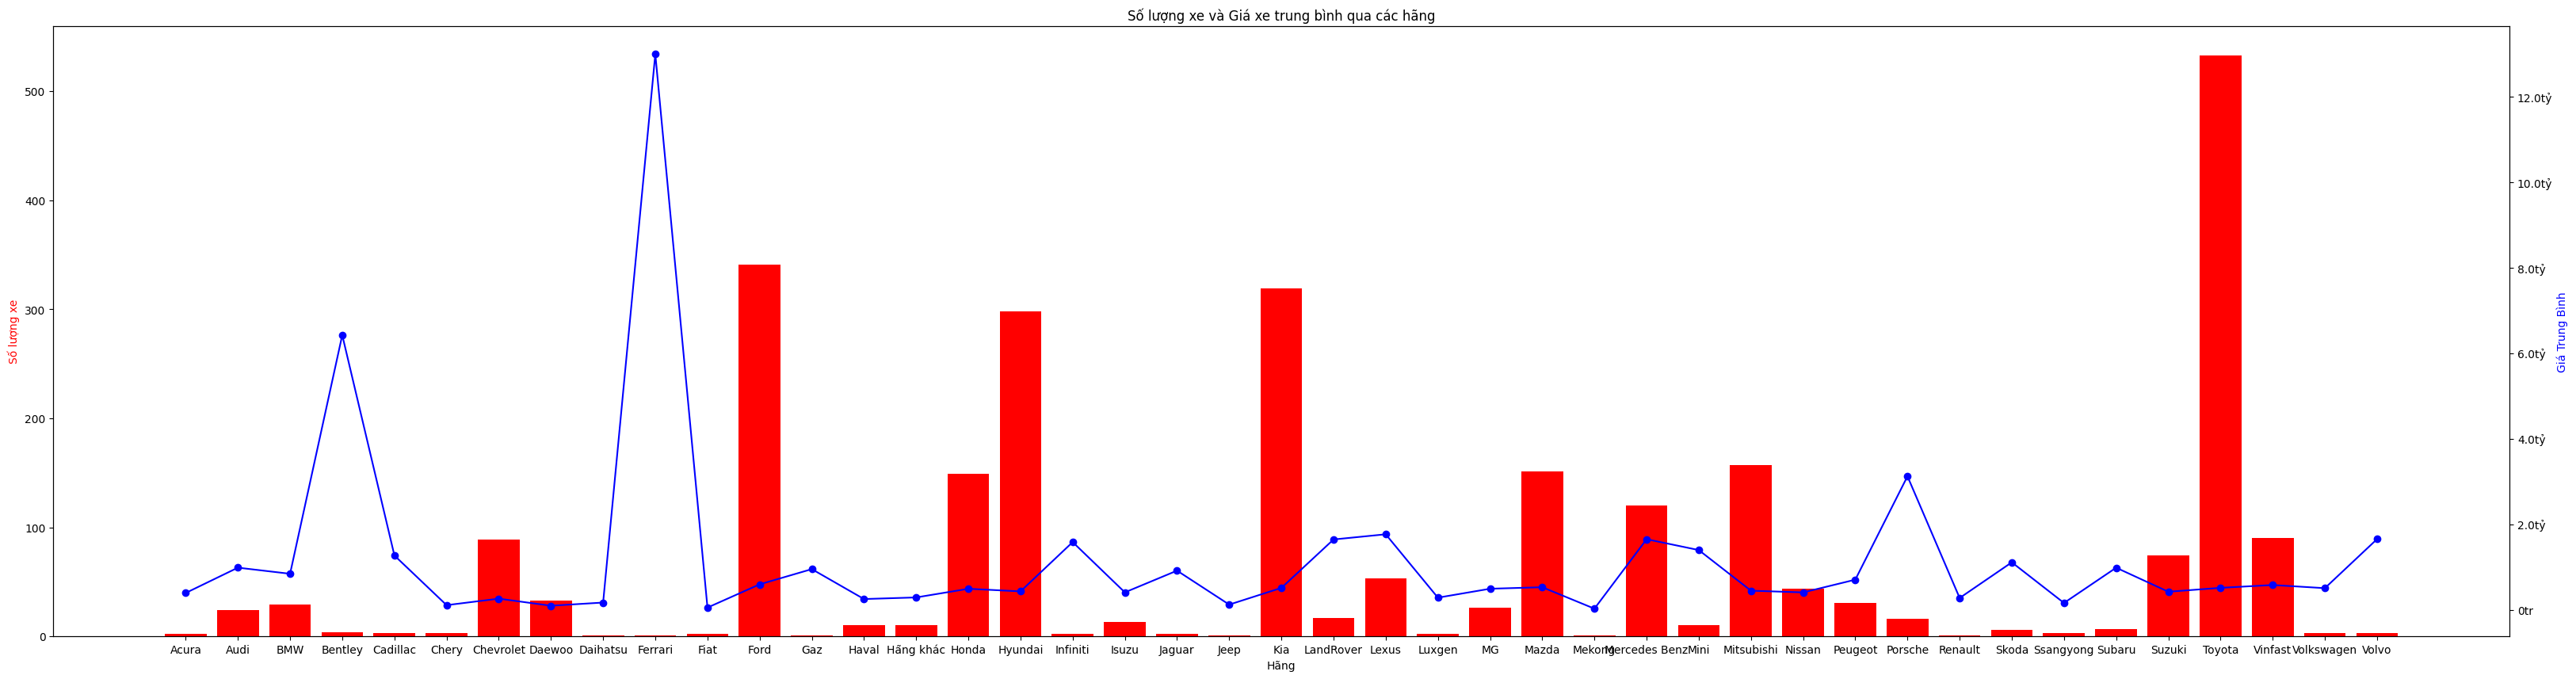

In [23]:
# Group by 'Năm sản xuất' and calculate the mean of 'Giá' for each group
average_prices_by_year = df.groupby('Hãng')['Giá'].mean()

# Count the number of cars in each year
car_count_by_year = df['Hãng'].value_counts().sort_index()

# Create a figure and primary y-axis
fig, ax1 = plt.subplots(figsize=(40, 10))

# Plot the car count on the primary y-axis
ax1.bar(car_count_by_year.index, car_count_by_year, color='r', zorder=2)
ax1.set_ylabel('Số lượng xe', color='r')

# Format y-axis tick labels as integers
ax1.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda y, loc: "{:,.0f}".format(y)))

# Create a secondary y-axis
ax2 = ax1.twinx()

# Plot the average prices on the secondary y-axis
ax2.plot(average_prices_by_year.index, average_prices_by_year, marker='o', linestyle='-', color='b', zorder=1)
ax2.set_ylabel('Giá Trung Bình', color='b')

# Format y-axis tick labels as integers
ax2.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda y, loc: "{:,.0f}tr".format(y / 1000000) if y < 1000000000 else "{:,.1f}tỷ".format(y / 1000000000)))

ax1.set_title('Số lượng xe và Giá xe trung bình qua các hãng')
ax1.set_xlabel('Hãng')

plt.show()

# **Năm sản xuất**

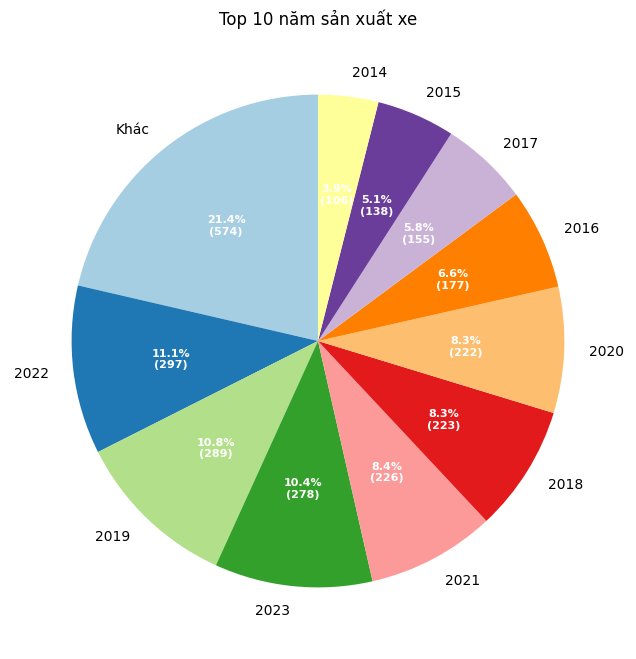

In [24]:
plot_circle_top10(df['Năm sản xuất'],'năm sản xuất xe')

In [25]:
df['Năm sản xuất'] = df['Năm sản xuất'].replace('trước năm 1980', '1980')

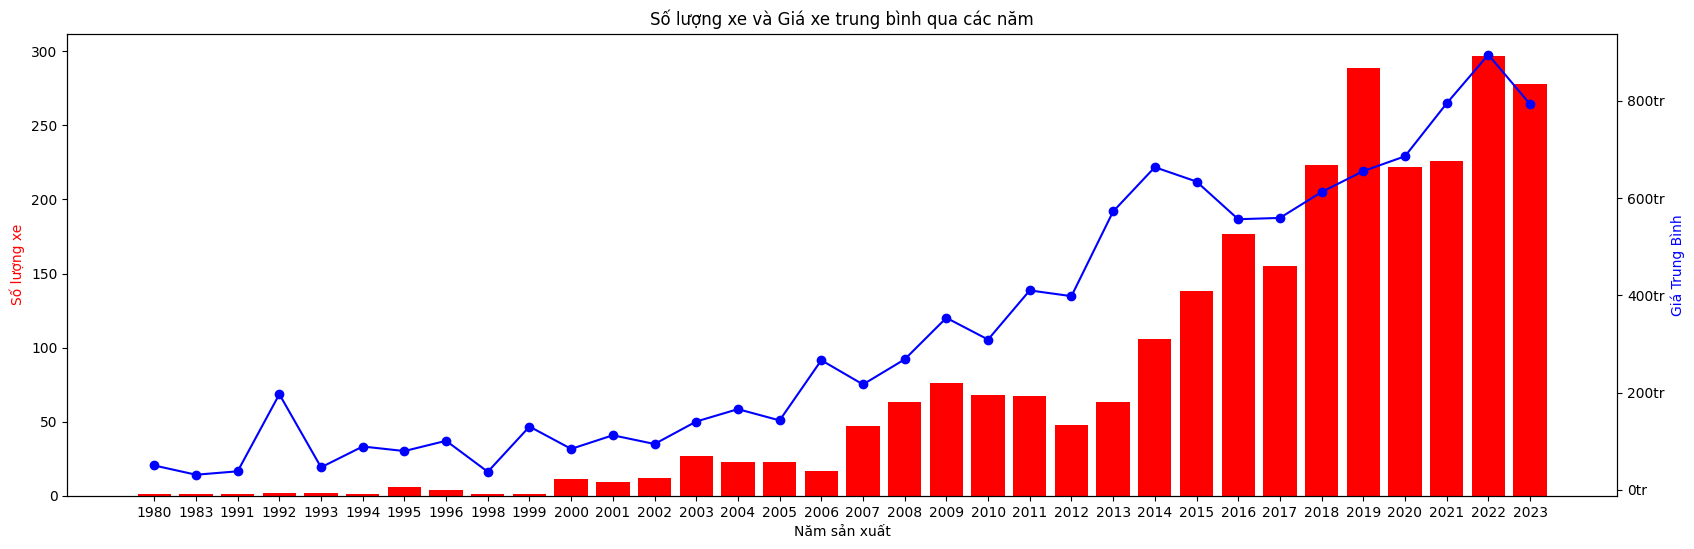

In [26]:
# Group by 'Năm sản xuất' and calculate the mean of 'Giá' for each group
average_prices_by_year = df.groupby('Năm sản xuất')['Giá'].mean()

# Count the number of cars in each year
car_count_by_year = df['Năm sản xuất'].value_counts().sort_index()

# Create a figure and primary y-axis
fig, ax1 = plt.subplots(figsize=(20, 6))

# Plot the car count on the primary y-axis
ax1.bar(car_count_by_year.index, car_count_by_year, color='r', zorder=2)
ax1.set_ylabel('Số lượng xe', color='r')

# Format y-axis tick labels as integers
ax1.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda y, loc: "{:,.0f}".format(y)))

# Create a secondary y-axis
ax2 = ax1.twinx()

# Plot the average prices on the secondary y-axis
ax2.plot(average_prices_by_year.index, average_prices_by_year, marker='o', linestyle='-', color='b', zorder=1)
ax2.set_ylabel('Giá Trung Bình', color='b')

# Format y-axis tick labels as integers
ax2.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda y, loc: "{:,.0f}tr".format(y / 1000000) if y < 1000000000 else "{:,.1f}tỷ".format(y / 1000000000)))

ax1.set_title('Số lượng xe và Giá xe trung bình qua các năm')
ax1.set_xlabel('Năm sản xuất')

plt.show()

# **Số km đã đi**

# **Tình trạng**

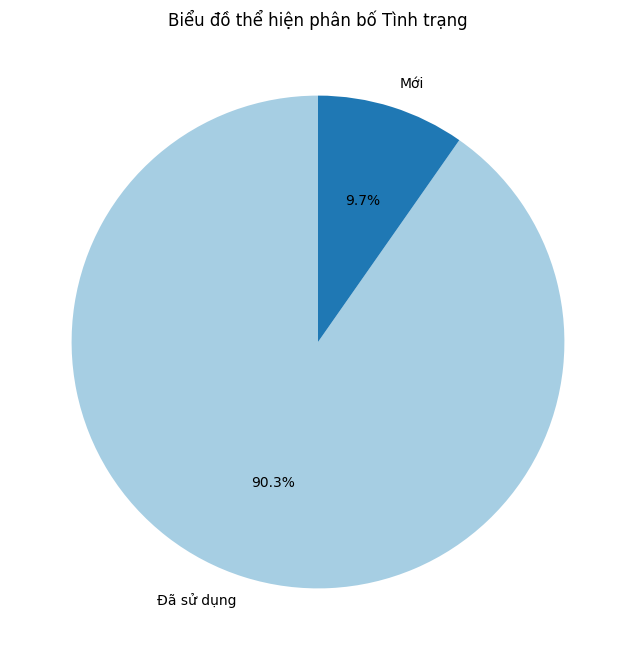

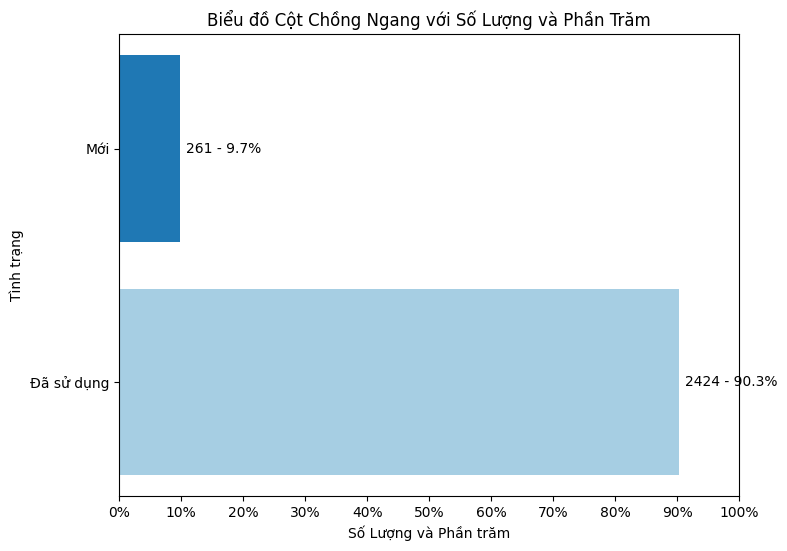

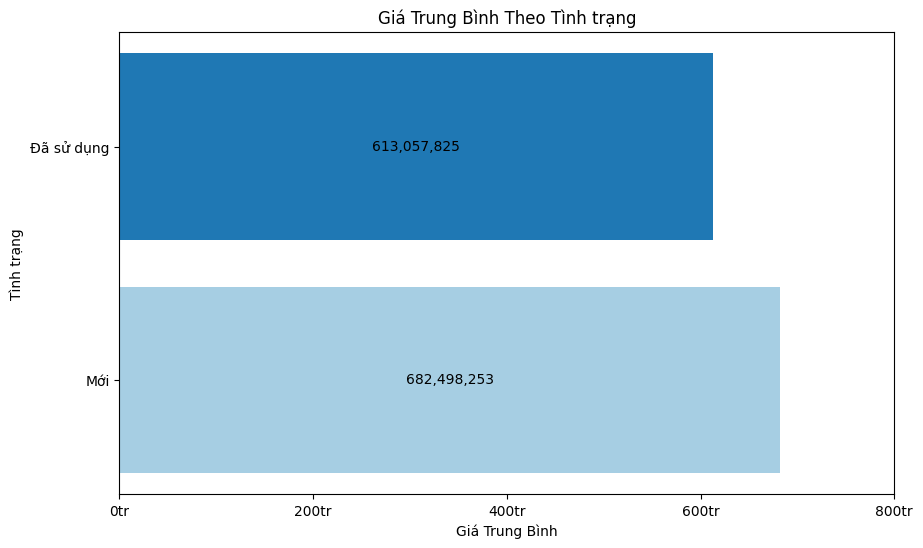

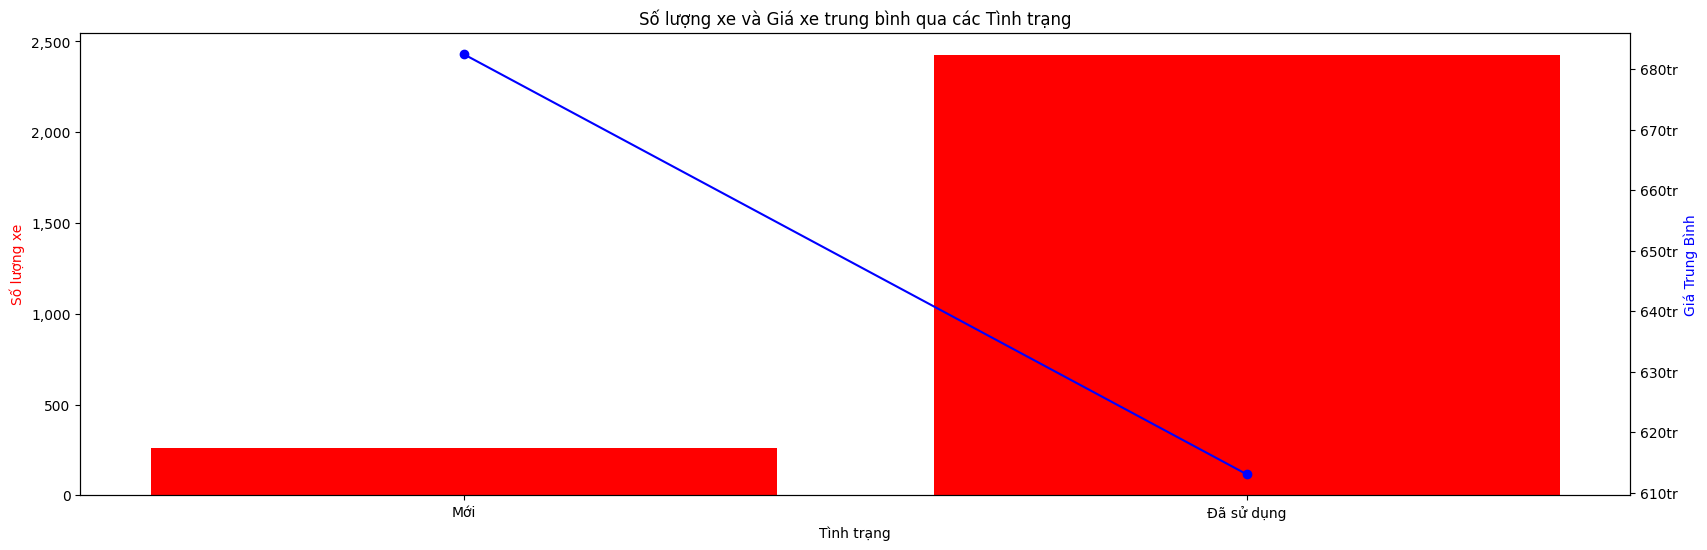

In [27]:
plot_few_value(df,df['Tình trạng'],'Tình trạng')

# **Hộp số**

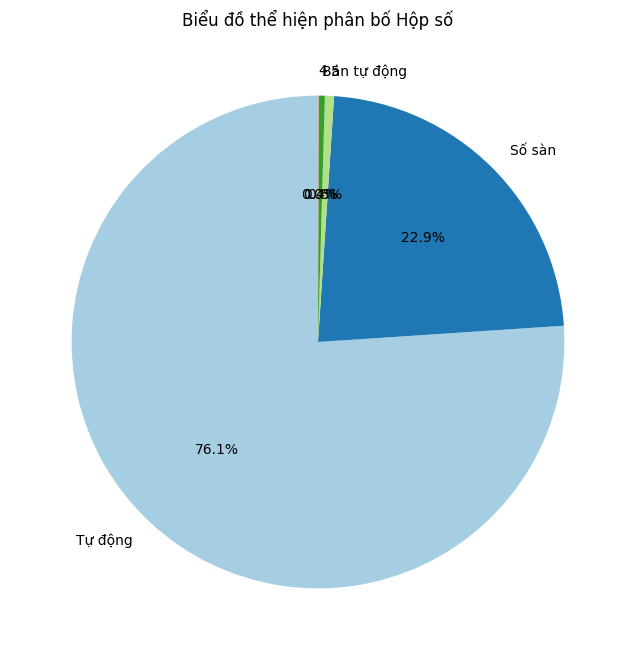

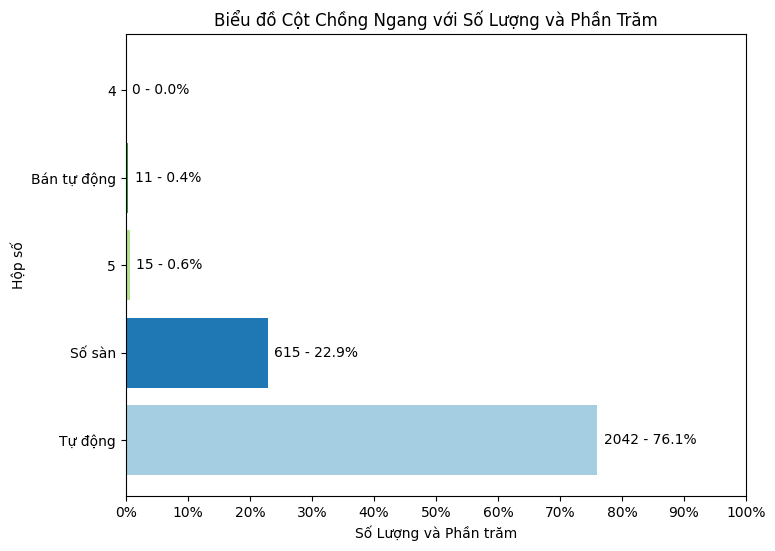

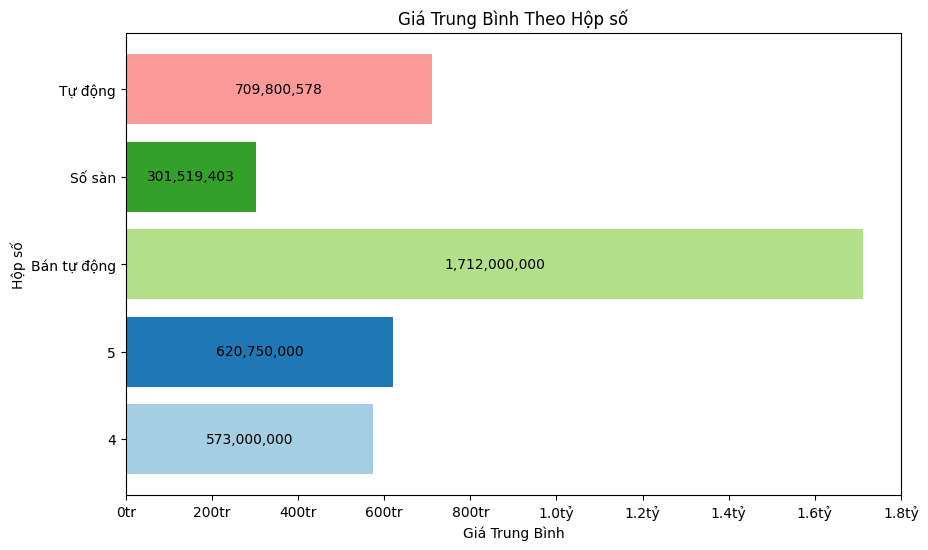

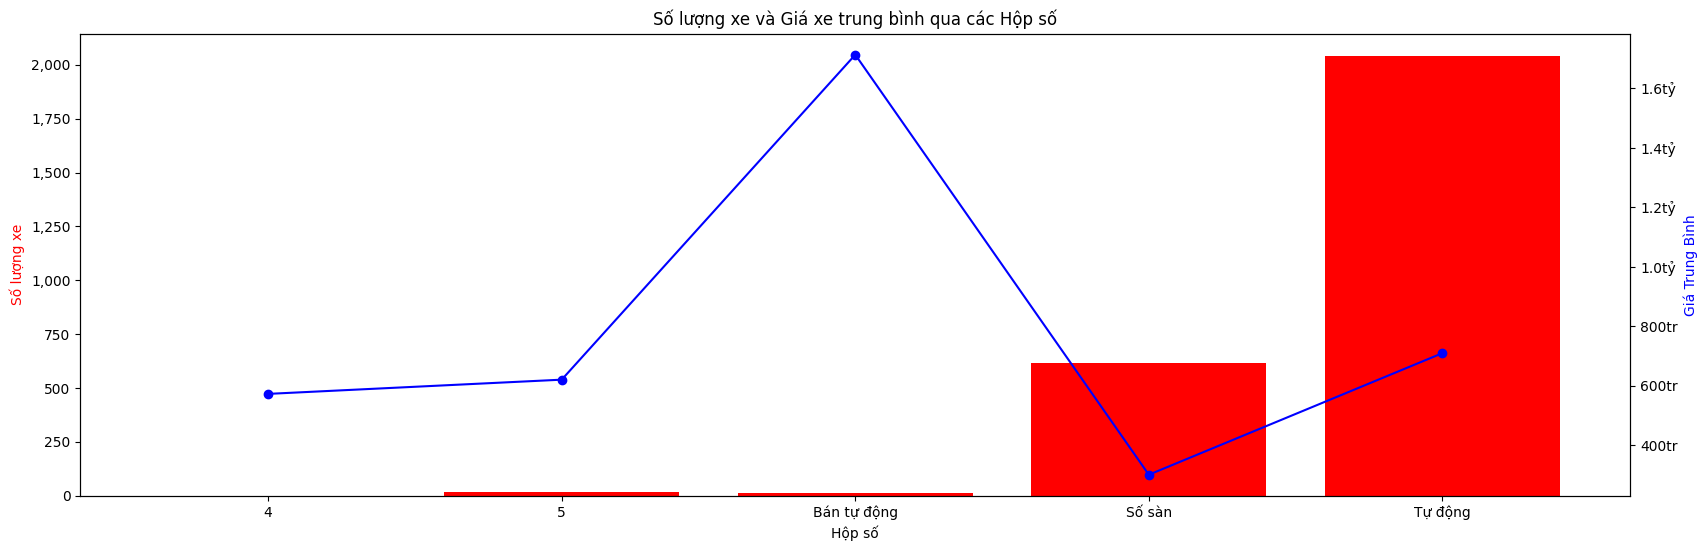

In [28]:
plot_few_value(df,df['Hộp số'],'Hộp số')

# **Nhiên liệu**

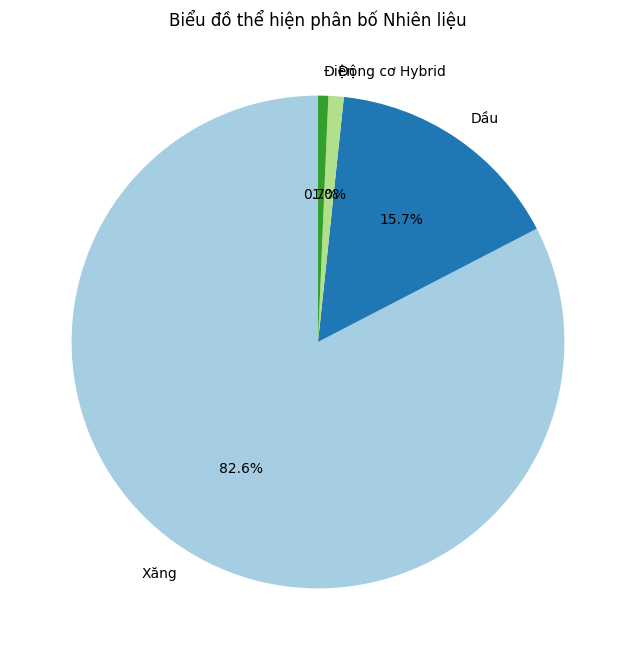

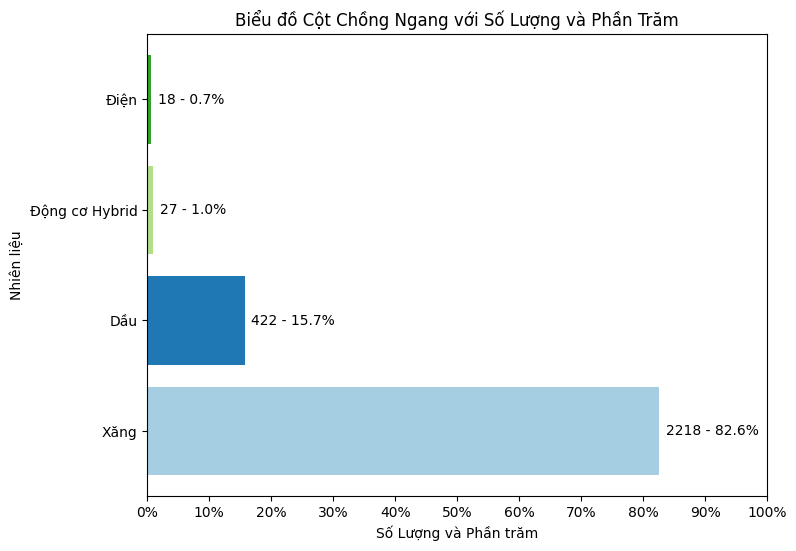

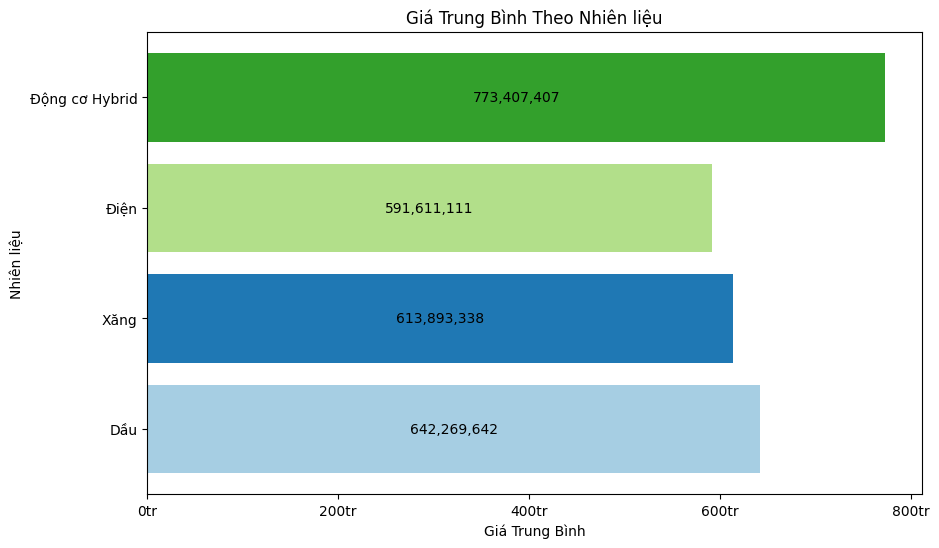

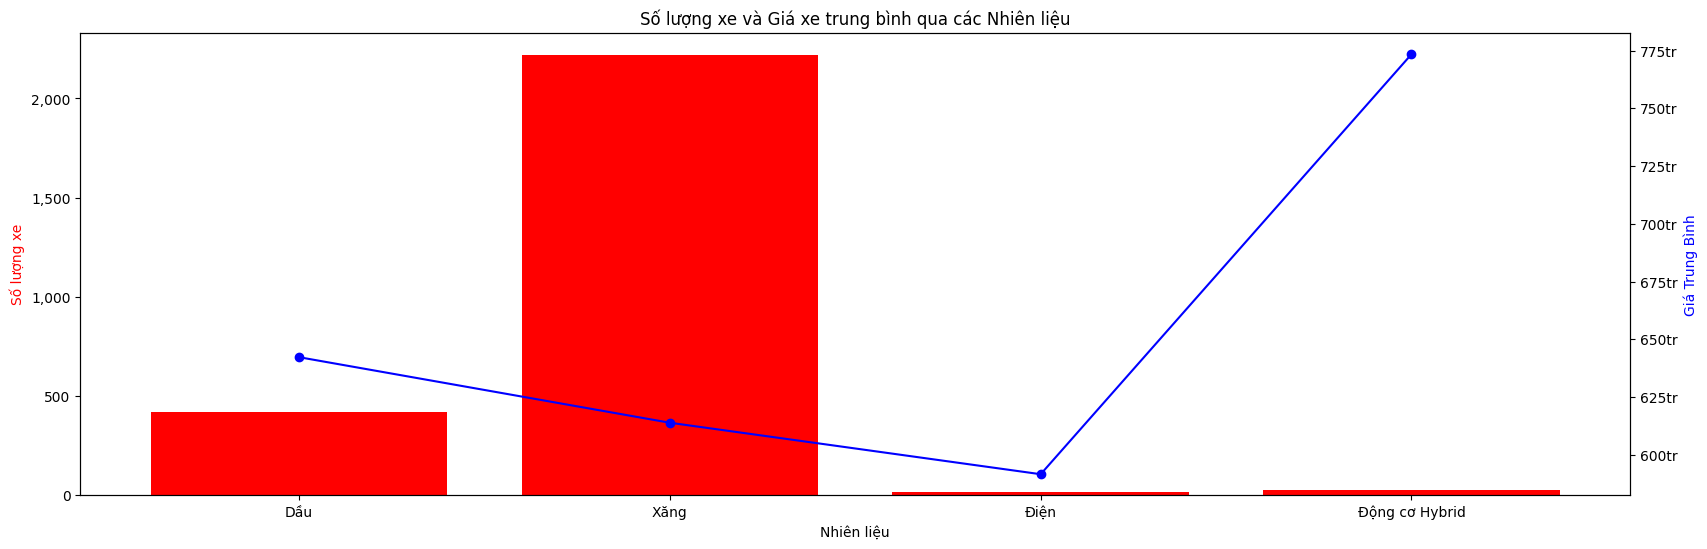

In [29]:
plot_few_value(df,df['Nhiên liệu'],'Nhiên liệu')

# **Kiểu dáng**

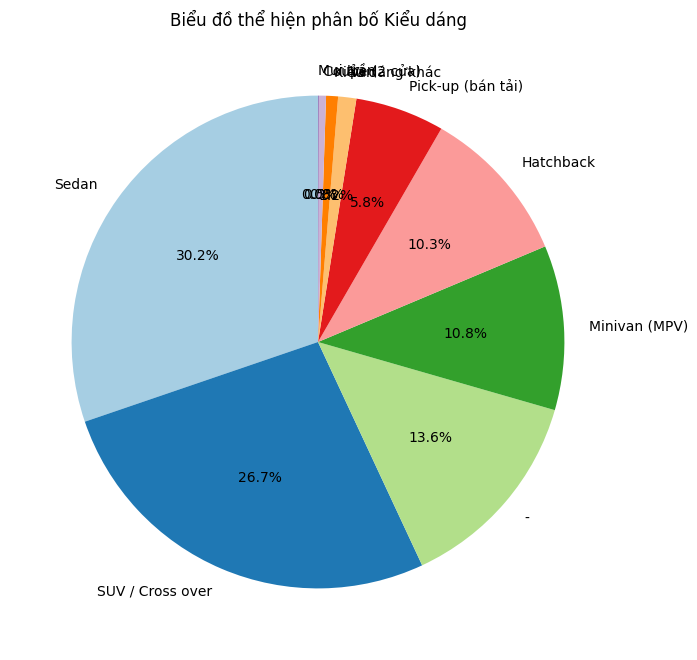

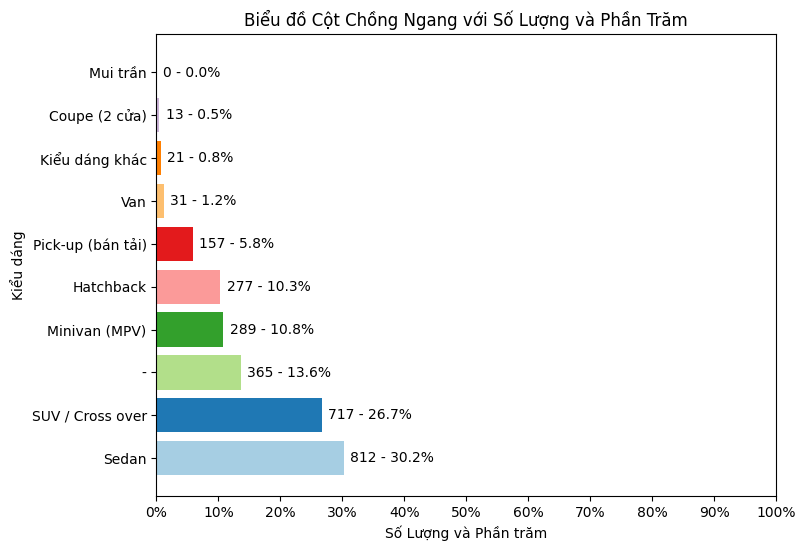

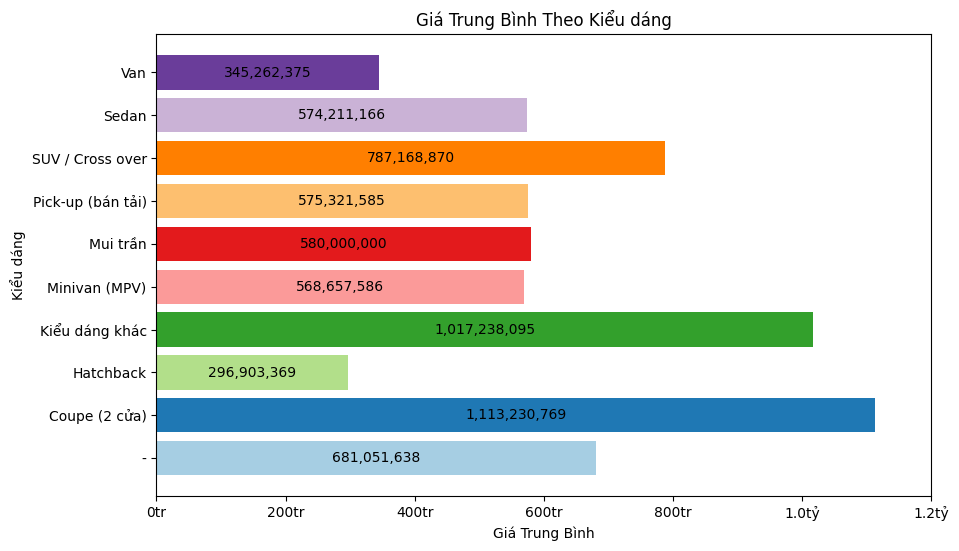

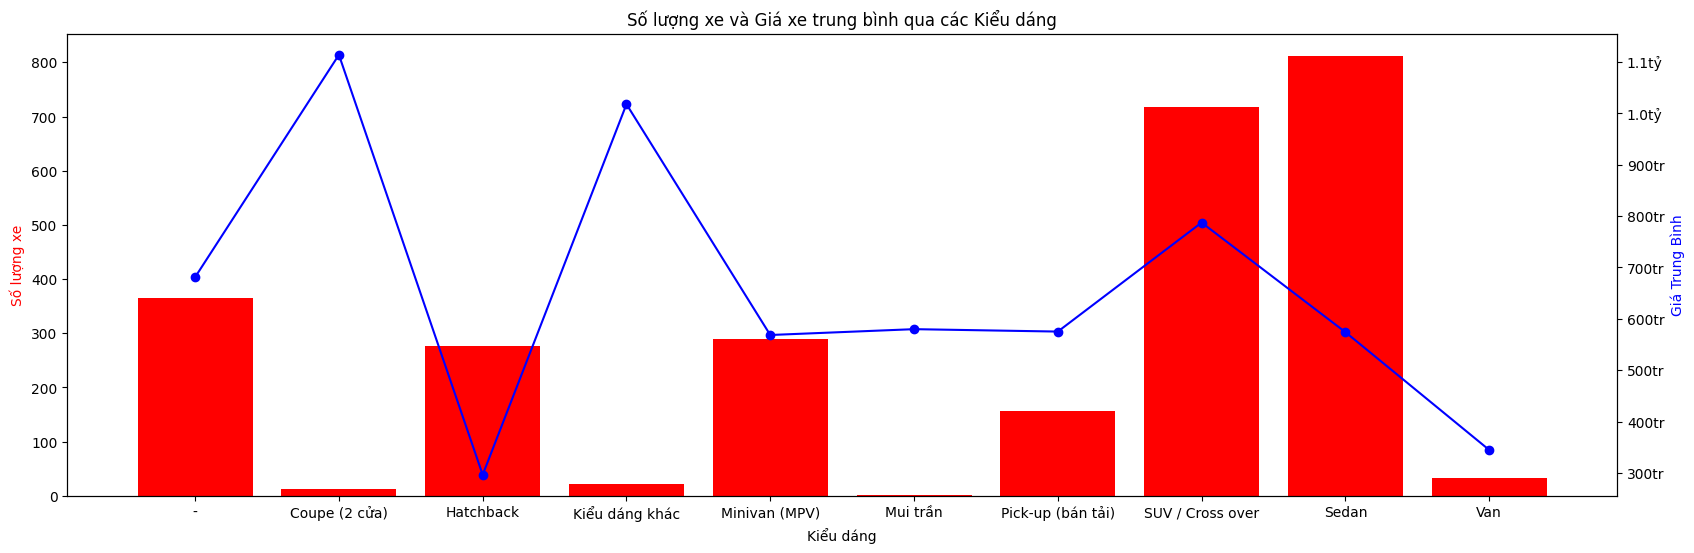

In [30]:
plot_few_value(df,df['Kiểu dáng'],'Kiểu dáng')

# **Số chỗ**

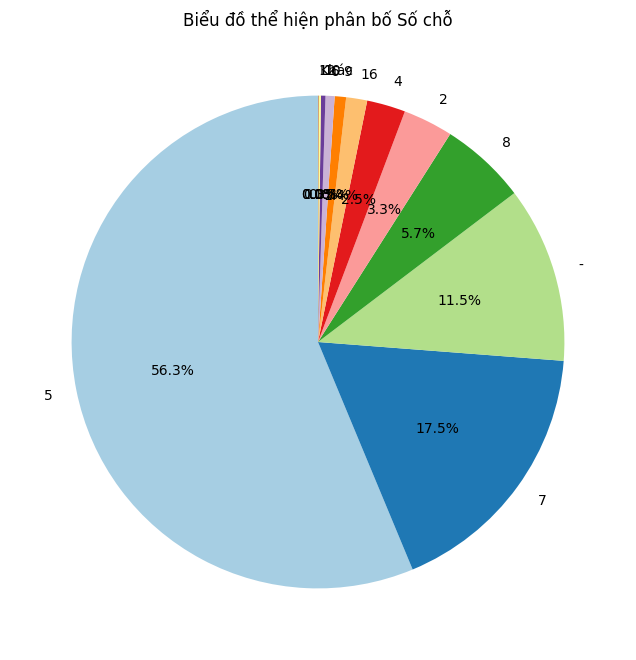

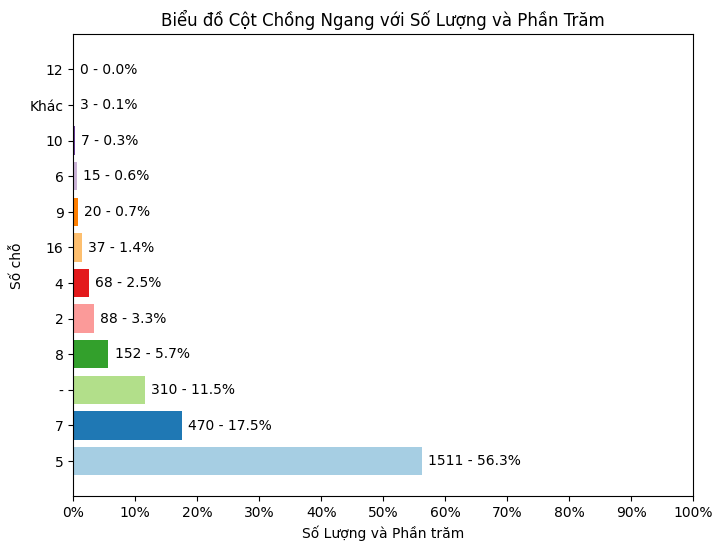

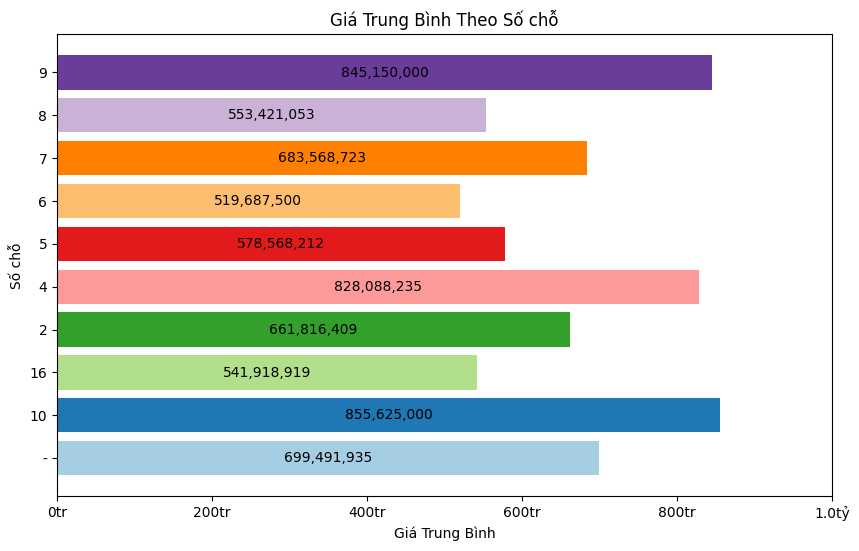

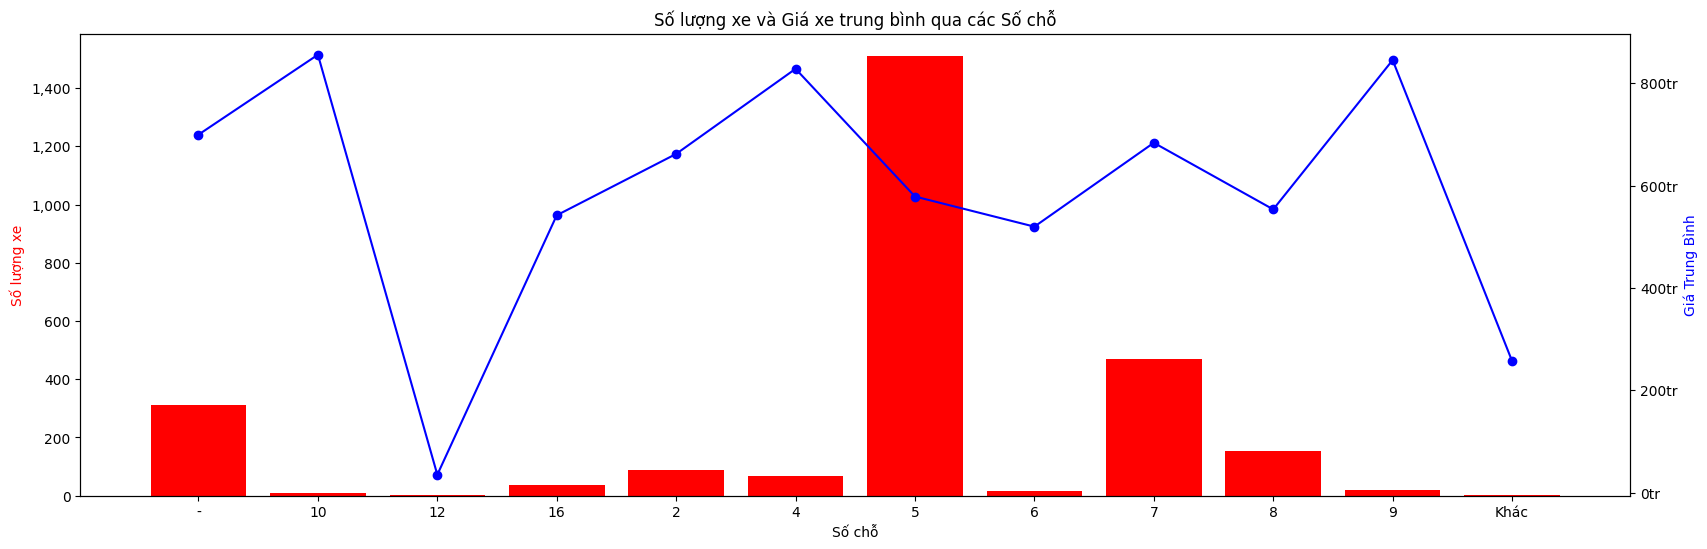

In [31]:
plot_few_value(df,df['Số chỗ'],'Số chỗ')

# **Xuất xứ**

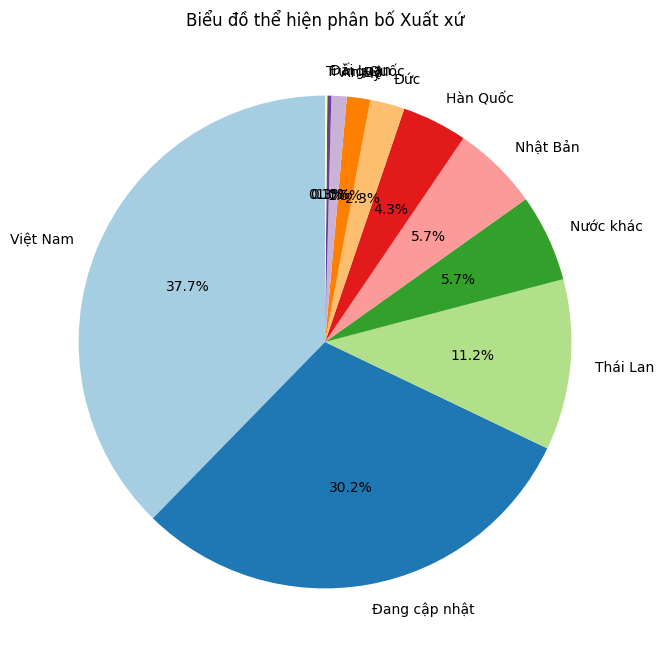

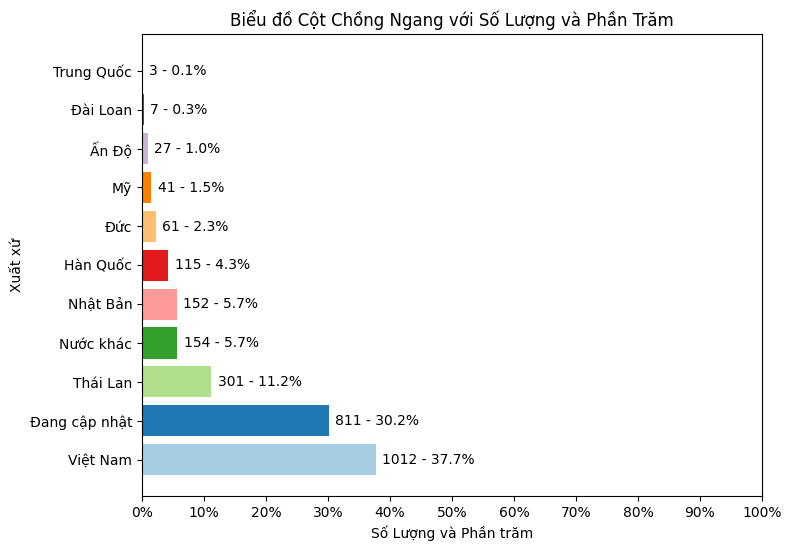

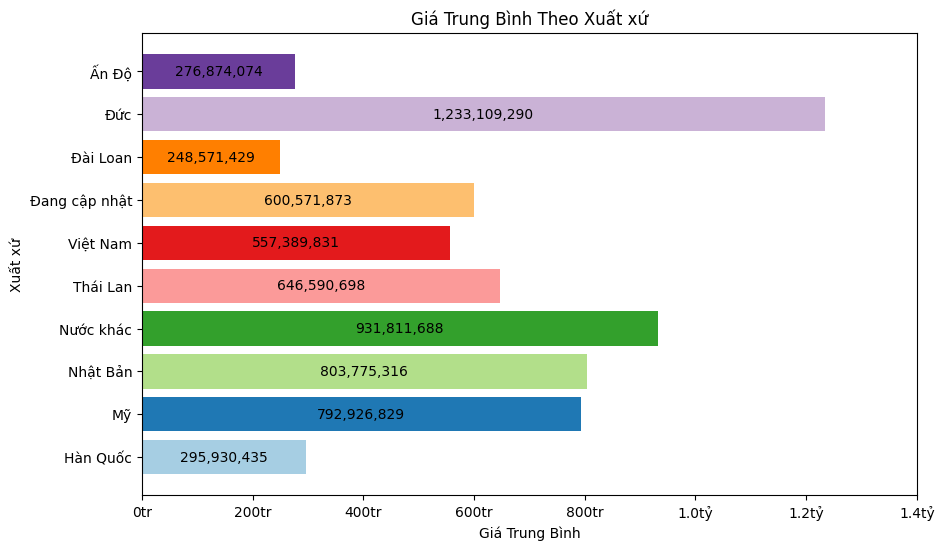

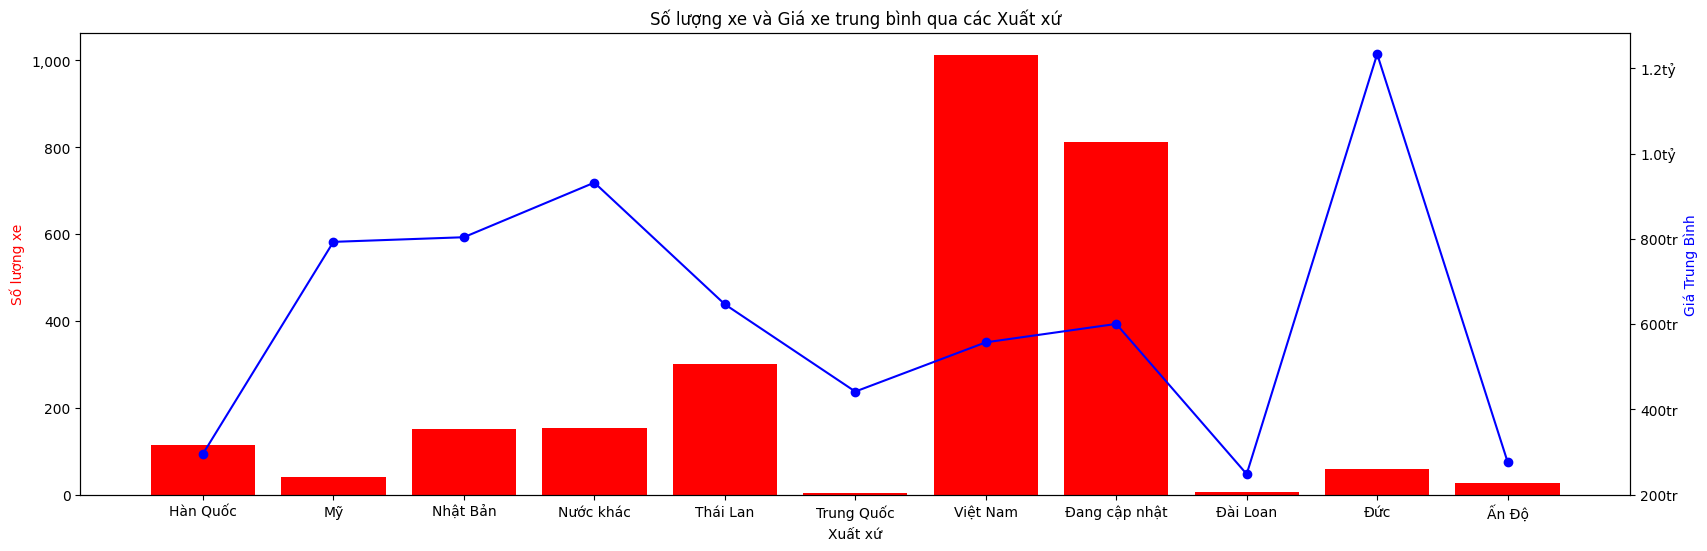

In [32]:
plot_few_value(df,df['Xuất xứ'],'Xuất xứ')